# **Letter classification algorithm**

## **Introduction**

This is the main program that makes different methods of number classification 

## **Machine Learning Algorithm**

This part contains the ML algorithm with different classifiers, firt there are some functions declarations that are used to manipulate the files in the folder.

In [1]:
import csv
import matplotlib.pyplot as plt 
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
import itertools
from sklearn.metrics import confusion_matrix

In [2]:
def read_csv(filename):
    labels = []
    letters = []
    with open(filename, 'r') as csvfile:
        spamreader = csv.reader(csvfile, delimiter=',', quotechar='|', quoting=csv.QUOTE_NONNUMERIC) 
        for row in spamreader:
            labels.append(row[-1])
            letters.append(np.array(row[:-1]))
           
    return labels, letters      

In [34]:
def plot_confusion_matrix(clf, data_x, data_y):
    classes = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26']

    Ypred = clf.predict(data_x)
    
    # Computation of confusion matrix on testing set
    cm = confusion_matrix(data_y, Ypred)
    
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion matrix')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [88]:
# Model training and accuracy computation for different k values

def tuning_parameter_new_knn(start_value, end_value, N):
    values = [i for i in range(start_value, end_value)]
    accs_train = []
    accs_test  = []

    # Train on the first N train images
    train_x = img_train[:N]
    train_y = label_train[:N]
    
     # Test on the next N/6 test images:
    test_x = img_test[:int(N/6)]
    test_y = label_test[:int(N/6)]

    for i in values:

        predictions_train = []
        predictions_test = []

        predictions_train = kk.kNearestNeighbor(train_x, train_y, train_x, train_y, i)
        accs_train.append(accuracy_score(train_y, predictions_train))

        predictions_test = kk.kNearestNeighbor(train_x, train_y, test_x, test_y, i)
        accs_test.append(accuracy_score(test_y, predictions_test))

    plt.figure(figsize=(16, 8))

    print("Optimal number for k: " + str(values[np.argmax(accs_test)]))

    # Draw accuracies as a function of the depth for both trainin and testing sets
    plt.plot(values, accs_train, label = 'Train Accuracy')
    plt.plot(values, accs_test,  label = 'Test Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Number of k')
    plt.legend()
    plt.xticks(values)
    plt.show()  

In [89]:
def tuning_parameter(start_value, end_value, N, model):
    # Model training and accuracy computation for different parameters
    values = [i for i in range(start_value, end_value)]
    accs_train = []
    accs_test  = []

    # Train on the first N train images
    train_x = img_train[:N]
    train_y = label_train[:N]
    
     # Test on the next N/6 test images:
    test_x = img_test[:int(N/6)]
    test_y = label_test[:int(N/6)]
    
    for i in values:
        if model == 1:
            clf = KNeighborsClassifier(n_neighbors=i)
        elif model == 2:
            clf = DecisionTreeClassifier(random_state = 0, max_depth = i)
        elif model == 3:
            clf = RandomForestClassifier(n_estimators=i)
        elif model == 4:
            clf = svm.LinearSVC(random_state=0)
        clf.fit(train_x, train_y)
        accs_train.append(clf.score(train_x, train_y))
        accs_test.append(clf.score(test_x, test_y))
    plt.figure(figsize=(16, 8))

    # Draw accuracies as a function of the depth for both trainin and testing sets
    if model == 1:
        plt.title("KNN")
    elif model == 2:
        plt.title("Decision Tree Classifier")
    elif model == 3:
        plt.title("Random Forest Classifier")
    elif model == 4:
        plt.title("Support Vector Machine")    
    plt.plot(values, accs_train, label = 'Train Accuracy')
    plt.plot(values, accs_test,  label = 'Test Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Parameter')
    plt.legend()
    plt.xticks(values)
    plt.show()  

In [90]:
print("Loading Training dataset...")
label_train, img_train = read_csv("emnist_train.csv")

print("Loading Testing dataset...")
label_test, img_test = read_csv("emnist_test.csv")

print("Finished loading!")

Loading Training dataset...
Loading Testing dataset...
Finished loading!


# **K-Nearest Neighbors algorithm created**

This section is presented the algorithme developped.

KK neighbors model
The accuracy is: 0.5542168674698795


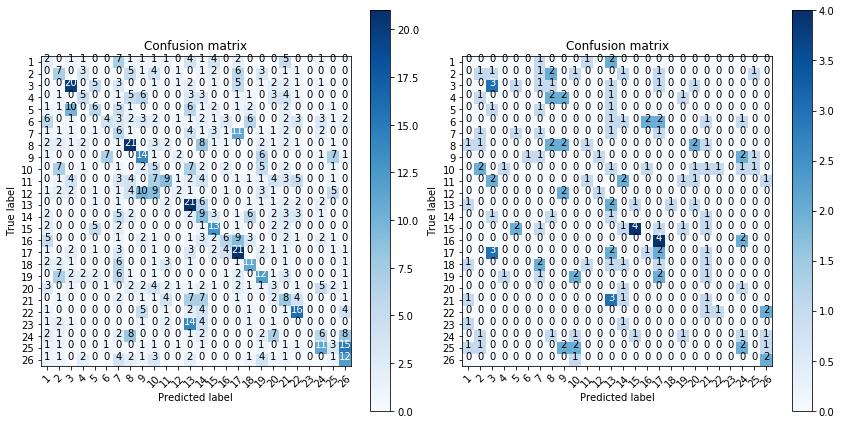

In [ ]:
%%time

import kk

def new_KNN(N, n_neighbors):
    print("KK neighbors model")
    
    # Train on the first N train images
    train_x = img_train[:N]
    train_y = label_train[:N]
    
     # Test on the next N/6 test images:
    test_x = img_test[:int(N/6)]
    test_y = label_test[:int(N/6)]
       
    #Predict the results of the test dataset
    predicted = kk.kNearestNeighbor(train_x, train_y, test_x, test_y, n_neighbors)

    print("The accuracy is: " + str(accuracy_score(test_y, predicted)))
    
    #Plot confusion matrix for analyse the classification
    plt.figure(figsize=(12,6))
    plt.subplot(121)
    plot_confusion_matrix(clf, train_x, train_y)
   
    plt.subplot(122)
    plot_confusion_matrix(clf, test_x, test_y)
    plt.show()
    
new_KNN(1000, 7)
tuning_parameter_new_knn(1, 5, 1000)

# **ScikitLearn classification methods**

## **KK Neighborhod**

In [ ]:
%%time

from sklearn.neighbors import KNeighborsClassifier

def KK(N):
    print("KK neighbors model")
    
    # Train on the first N train images
    train_x = img_train[:N]
    train_y = label_train[:N]
    
     # Test on the next N/6 test images:
    test_x = img_test[:int(N/6)]
    test_y = label_test[:int(N/6)]
    
    # Create the classifier using the scikit learn library
    clf = KNeighborsClassifier(n_neighbors=1)
    
    #Train the classifier
    clf.fit(train_x, train_y)
    
    #Predict the results of the test dataset
    predicted = clf.predict(test_x)
    print("The accuracy is: " + str(accuracy_score(test_y, predicted)))
    
    #Plot confusion matrix for analyse the classification
    plt.figure(figsize=(12,6))
    plt.subplot(121)
    plot_confusion_matrix(clf, train_x, train_y)
   
    plt.subplot(122)
    plot_confusion_matrix(clf, test_x, test_y)
    plt.show()
    
KK(1000)
tuning_parameter(1, 5, 1000, 1)

## **Decision Tree**

In [ ]:
%%time

from sklearn.tree import DecisionTreeClassifier

def DecisionTree(N):
    print("Decision Tree model")
    
    # Train on the first N train images
    train_x = img_train[:N]
    train_y = label_train[:N]
    
     # Test on the next N/6 test images:
    test_x = img_test[:int(N/6)]
    test_y = label_test[:int(N/6)]
    
    # Create the classifier using the scikit learn library
    clf = DecisionTreeClassifier(random_state = 0, max_depth = 15)
    
    #Train the classifier
    clf.fit(train_x, train_y)
    
    #Predict the results of the test dataset
    predicted = clf.predict(test_x)
    print("The accuracy is: " + str(accuracy_score(test_y, predicted)))
    
    #Plot confusion matrix for analyse the classification
    plt.figure(figsize=(12,6))
    plt.subplot(121)
    plot_confusion_matrix(clf, train_x, train_y)
   
    plt.subplot(122)
    plot_confusion_matrix(clf, test_x, test_y)
    plt.show()
    
DecisionTree(10000)
tuning_parameter(1, 5, 10000, 2)

## **Random Forest**

In [ ]:
%%time

from sklearn.ensemble import RandomForestClassifier

def RandomForest(N):
    print("Random Forest model")
    
    # Train on the first N train images
    train_x = img_train[:N]
    train_y = label_train[:N]
    
     # Test on the next N/6 test images:
    test_x = img_test[:int(N/6)]
    test_y = label_test[:int(N/6)]
    
    # Create the classifier using the scikit learn library
    clf = RandomForestClassifier(n_estimators=100)
    
    #Train the classifier
    clf.fit(train_x, train_y)
    
    #Predict the results of the test dataset
    predicted = clf.predict(test_x)
    print("The accuracy is: " + str(accuracy_score(test_y, predicted)))
    
    #Plot confusion matrix for analyse the classification
    plt.figure(figsize=(12,6))
    plt.subplot(121)
    plot_confusion_matrix(clf, train_x, train_y)
   
    plt.subplot(122)
    plot_confusion_matrix(clf, test_x, test_y)
    plt.show()
    
RandomForest(1000)
tuning_parameter(1, 5, 1000, 3)

## **SVM**

In [ ]:
%%time

from sklearn import svm

def SupportVectorMachine(N):
    print("Support Vector Machine model")
    
    # Train on the first N train images
    train_x = img_train[:N]
    train_y = label_train[:N]
    
     # Test on the next N/6 test images:
    test_x = img_test[:int(N/6)]
    test_y = label_test[:int(N/6)]
    
    # Create the classifier using the scikit learn library
    clf = svm.LinearSVC(random_state=0)
    
    #Train the classifier
    clf.fit(train_x, train_y)
    
    #Predict the results of the test dataset
    predicted = clf.predict(test_x)
    print("The accuracy is: " + str(accuracy_score(test_y, predicted)))
    
    #Plot confusion matrix for analyse the classification
    plt.figure(figsize=(12,6))
    plt.subplot(121)
    plot_confusion_matrix(clf, train_x, train_y)
   
    plt.subplot(122)
    plot_confusion_matrix(clf, test_x, test_y)
    plt.show()
    
SupportVectorMachine(1000)
tuning_parameter(1, 5, 1000, 4)